# FMP Stock Fundamentals Exploration 4 : Revenue Geographic by Segments

Welcome to this Jupyter Notebook of the Finsloth.

In this first Notebook of our series, we are going to explore the first element of FMP Stock Fundamentals which is a Financial Statement.

Our goal is to understand **the meaning and the structure of each data given by FMP, how to transform it for actual use in any trading or investing strategies**.

## About Financial Modeling Prep


Financial Modeling Prep is a stock market API that provides a wide range of data. Data covers stocks, crypto forex and commodities.

You have addition data such as institutional stock ownership, esg score, price target, etc.

There are several plans including a free one.

I am on a start plan for this notebook. Here are the link for the pricing: https://site.financialmodelingprep.com/developer/docs/pricing/

## Revenue by regions

While this not a complete dive into sales, it's more of an annex to the actual sales of a company, and the exploration of how to see data from the geographic angle.

I've already posted in my github a notebook about sales: https://github.com/Kvnatn/Thefinsloth-JupyterNotebook/blob/main/FMP%20-%20Stock%20Fundamentals%20Exploration%20-%20Sales.ipynb

## Initial Import and API Key

In this section, we are going to perform classic libraries import to perform our data transformation and visualisation.

In [103]:
# We import the basics and some specific to APIs libraries

# Data Manipulation Librairies
import pandas as pd

# requests is another way of sending an API request to FMP
import requests

# json library makes it easier to access JSON format
import json

# Datavisualization Library
import matplotlib.pyplot as plt

For privacy reason, I have hidden my key to access the API.

Here is the link to the dashboard where you can find your private key in case you created an account: https://site.financialmodelingprep.com/developer/docs/dashboard

In [104]:
# Because I want to share this file on Github, I made sure that it's not showing the actual key.
key = pd.read_csv('/Users/kevinrakotondrasoa/Documents/coding/key.txt', header=None)[0][0]

FMP provides us the right method to extract data from its API according to the coding language you are using.

Here is the function they provided us to extract data with Python.

## Annual Revenue Geographic Segmentation

### Raw Exploration

Let's have a quick look at what the data looks like in the API calls

In [105]:
# API call

# Building our url according
url = 'https://financialmodelingprep.com/api/v4/revenue-geographic-segmentation?symbol=AAPL&structure=flat&apikey='+key


# args stands for Annual Revenue Geographic Segmentation
args = requests.get(url).json()

In [106]:
# Exploring call
print(args)

[{'2021-09-25': {'Americas Segment': 153306000000, 'Europe Segment': 89307000000, 'Greater China Segment': 68366000000, 'Japan Segment': 28482000000, 'Rest of Asia Pacific Segment': 26356000000}}, {'2020-09-26': {'Americas Segment': 124556000000, 'Europe Segment': 68640000000, 'Greater China Segment': 40308000000, 'Japan Segment': 21418000000, 'Rest of Asia Pacific Segment': 19593000000}}, {'2019-09-28': {'Americas Segment': 116914000000, 'Europe Segment': 60288000000, 'Greater China Segment': 43678000000, 'Japan Segment': 21506000000, 'Rest of Asia Pacific Segment': 17788000000}}, {'2018-09-29': {'Americas Segment': 112093000000, 'Europe Segment': 62420000000, 'Greater China Segment': 51942000000, 'Japan Segment': 21733000000, 'Rest of Asia Pacific Segment': 17407000000}}, {'2017-09-30': {'Americas Segment': 96600000000, 'Europe Segment': 54938000000, 'Greater China Segment': 44764000000, 'Japan Segment': 17733000000, 'Rest of Asia Pacific Segment': 15199000000}}, {'2016-09-24': {'Ame

Just for like our sales, we have nested dictionaries, with one high level dictionnary with dates and segments, and a lower level with all segments and matching sales.

Let's have a look at the lower dictionnary in our call.

In [107]:
# Lower level nested dictionnary
args[0].values()

dict_values([{'Americas Segment': 153306000000, 'Europe Segment': 89307000000, 'Greater China Segment': 68366000000, 'Japan Segment': 28482000000, 'Rest of Asia Pacific Segment': 26356000000}])

We will reuse the lines of code in the previous Jupyter Notebook.

## Building DataFrame

We want to build a dataframe that has 2 rows and 5 columns (which corresponds to the latest report of geographical revenue.

###### Building our list of dataframe

We first need to build a list with all the dataframes that we want to have in our main dataframe.

In [108]:
# Running through the different dictionnaries and creating our list of dataframes.
# We create an empty list that will contain our list of DataFrame
df_list = []

# We iterate through the values of our list which are dictionnaries
for item in args:
    # We iterate through the values of each dictionnary of our list
    for values in item.values():
        # We only keep the ones with the right shape
        if pd.DataFrame.from_dict(values.items()).transpose().shape == (2,5):
            # We append the each element to our list at the beginning
            # It's important to transpose each dataframe to have as a column the name of each categories of sales
            df_list.append(pd.DataFrame.from_dict(values.items()).transpose())

# We only keep the element we want for our analysis
df_list = df_list[:6]

# We should have 6 elements in our list
print(len(df_list))

# Inspecting the list
print(df_list[0])

6
                  0               1                      2              3  \
0  Americas Segment  Europe Segment  Greater China Segment  Japan Segment   
1      153306000000     89307000000            68366000000    28482000000   

                              4  
0  Rest of Asia Pacific Segment  
1                   26356000000  


##### Preparing our dataframe elements: column and index

We prepare our column by iterating through our list, and our index by extracting the keys of our initial call.

In [109]:
# Preparing our columns

# Building our empty list
columns = []

# Going through our list
for i in range(0,5):
    columns.append(df_list[0][i][0])
    
print(columns)

['Americas Segment', 'Europe Segment', 'Greater China Segment', 'Japan Segment', 'Rest of Asia Pacific Segment']


Then we build our index. We will convert it to a datetime index later.

In [110]:
# Preparing our index

# Building our empty list
index = []

# Iteration through all the different element of our list, and the keys of our dictionnaries that are added to our index list
for item in args:
    for key in item.keys():
        index.append(key)

# Selecting the first 14 dates
index = index[:6]

# Inspecting
index

['2021-09-25',
 '2020-09-26',
 '2019-09-28',
 '2018-09-29',
 '2017-09-30',
 '2016-09-24']

##### Stacking our dataframe and editing

We are all set and ready. We can now build our dataframe of sales of Apple.

We will do that by:
- concatenating our list of dataframes,
- changing the column names using our list of column,
- changing the index using our list of index

In [111]:
# Concatenating our dataframe
df2 = pd.concat(df_list)

# Inspecting
df2.head()

,0,1,2,3,4
0,Americas Segment,Europe Segment,Greater China Segment,Japan Segment,Rest of Asia Pacific Segment
1,153306000000,89307000000,68366000000,28482000000,26356000000
0,Americas Segment,Europe Segment,Greater China Segment,Japan Segment,Rest of Asia Pacific Segment
1,124556000000,68640000000,40308000000,21418000000,19593000000
0,Americas Segment,Europe Segment,Greater China Segment,Japan Segment,Rest of Asia Pacific Segment


In [112]:
# Removing unnecessary lines with filtering
df2 = df2[df2.index.values == 1]

# Inspecting
df2

,0,1,2,3,4
1,153306000000,89307000000,68366000000,28482000000,26356000000
1,124556000000,68640000000,40308000000,21418000000,19593000000
1,116914000000,60288000000,43678000000,21506000000,17788000000
1,112093000000,62420000000,51942000000,21733000000,17407000000
1,96600000000,54938000000,44764000000,17733000000,15199000000
1,86613000000,49952000000,48492000000,16928000000,13654000000


In [113]:
# We use the reset index method 
df2.reset_index(inplace=True)

In [114]:
# Removing columns
df2.drop(columns=["index"], inplace=True)

In [115]:
# Renaming columns
df2.columns = columns

# Renaming index
df2.index = index

In [116]:
# Inspecting
df2

,Americas Segment,Europe Segment,Greater China Segment,Japan Segment,Rest of Asia Pacific Segment
2021-09-25,153306000000,89307000000,68366000000,28482000000,26356000000
2020-09-26,124556000000,68640000000,40308000000,21418000000,19593000000
2019-09-28,116914000000,60288000000,43678000000,21506000000,17788000000
2018-09-29,112093000000,62420000000,51942000000,21733000000,17407000000
2017-09-30,96600000000,54938000000,44764000000,17733000000,15199000000
2016-09-24,86613000000,49952000000,48492000000,16928000000,13654000000


##### Converting to datetime index

In finance and economics, most of the data corresponds to timeseries.

In [117]:
# Converting our dataframe index to datetime index
df2.index = pd.to_datetime(df2.index)

# Inspecting
df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6 entries, 2021-09-25 to 2016-09-24
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Americas Segment              6 non-null      object
 1   Europe Segment                6 non-null      object
 2   Greater China Segment         6 non-null      object
 3   Japan Segment                 6 non-null      object
 4   Rest of Asia Pacific Segment  6 non-null      object
dtypes: object(5)
memory usage: 288.0+ bytes


## Sales Dataviz

### Comparing revenues

Building graphs upon our data can help us understand where do our selected company is doing on different regions.

In [118]:
# Sorting values through index
df2.sort_index(ascending=True, inplace=True)

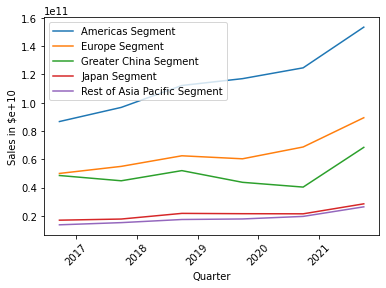

In [119]:
# We are setting up our plots
fig, ax = plt.subplots()

# Looping through all the different columns in our dataframe
for i in range(0,5):
    ax.plot(df2.index, df2[columns[i]], label=columns[i])
    

    
# Adding labels, legends, and some rotations to our parameters
ax.set_xlabel('Quarter')
ax.set_ylabel('Sales in $e+10')
ax.tick_params(axis='x', rotation=45)
ax.legend()

# Showing our plot
plt.show()

We can observe that Americas is the one segment moving Apple's sales.

And while South East Asia and Japan are neck and neck, Europe has been able to outrace China in the last 3 years when it comes to buying Apple product.

### Market shares per region

To perform the analysis of market shares, we will build additional columns that provides necessary data.

In [120]:
# Adding a total sales column to our dataframe
df2['total sales'] = df2.sum(axis=1)

In [121]:
# computing our new columns
# We the list of our new columns names
shares = ['Americas', 'Europe', 'China', 'Japan', 'Asia']

# We create a loop to go through our list and build our additional columns
for i in range(0,5):
    df2[shares[i]] = (df2[columns[i]]/df2['total sales'])*100

In [122]:
# Inspecting our new dataframe
df2

,Americas Segment,Europe Segment,Greater China Segment,Japan Segment,Rest of Asia Pacific Segment,total sales,Americas,Europe,China,Japan,Asia
2016-09-24,86613000000,49952000000,48492000000,16928000000,13654000000,2.156390e+11,40.16574,23.164641,22.487583,7.850157,6.331879
2017-09-30,96600000000,54938000000,44764000000,17733000000,15199000000,2.292340e+11,42.140346,23.965904,19.527644,7.735763,6.630343
2018-09-29,112093000000,62420000000,51942000000,21733000000,17407000000,2.655950e+11,42.204484,23.501948,19.556844,8.182759,6.553964
2019-09-28,116914000000,60288000000,43678000000,21506000000,17788000000,2.601740e+11,44.93685,23.172185,16.787996,8.266007,6.836963
2020-09-26,124556000000,68640000000,40308000000,21418000000,19593000000,2.745150e+11,45.373113,25.004098,14.683351,7.802124,7.137315
2021-09-25,153306000000,89307000000,68366000000,28482000000,26356000000,3.658170e+11,41.907839,24.413026,18.688579,7.78586,7.204695


In [123]:
# Using iloc to select all rows, and the last 5 columns of our df2 dataframe
df_result = df2.iloc[:,5:]

# Building our DataFrame
df5 = df_result.loc[:, 'Americas':]

# Inspecting
df5

,Americas,Europe,China,Japan,Asia
2016-09-24,40.16574,23.164641,22.487583,7.850157,6.331879
2017-09-30,42.140346,23.965904,19.527644,7.735763,6.630343
2018-09-29,42.204484,23.501948,19.556844,8.182759,6.553964
2019-09-28,44.93685,23.172185,16.787996,8.266007,6.836963
2020-09-26,45.373113,25.004098,14.683351,7.802124,7.137315
2021-09-25,41.907839,24.413026,18.688579,7.78586,7.204695


In [124]:
# We use years as index
df5.index = ['2016', '2017', '2018', '2019', '2020', '2021']

# Inspecting
df5

,Americas,Europe,China,Japan,Asia
2016,40.16574,23.164641,22.487583,7.850157,6.331879
2017,42.140346,23.965904,19.527644,7.735763,6.630343
2018,42.204484,23.501948,19.556844,8.182759,6.553964
2019,44.93685,23.172185,16.787996,8.266007,6.836963
2020,45.373113,25.004098,14.683351,7.802124,7.137315
2021,41.907839,24.413026,18.688579,7.78586,7.204695


/var/folders/sn/wq_2w76s333b7xmhtx39fzs80000gn/T/ipykernel_83770/3709552380.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df5.index, rotation=45)


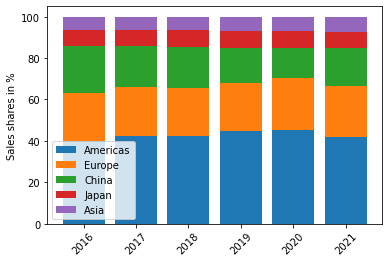

In [127]:
# Setting up all our subplots
fig, ax = plt.subplots()


# Editing each bars
ax.bar(df5.index, df5[shares[0]], label= shares[0])
ax.bar(df5.index, df5[shares[1]], label = shares[1], bottom = df5[shares[0]])
ax.bar(df5.index, df5[shares[2]], label = shares[2], bottom = df5[shares[1]] + df5[shares[0]])
ax.bar(df5.index, df5[shares[3]], label = shares[3], bottom = df5[shares[2]] + df5[shares[1]] + df5[shares[0]])
ax.bar(df5.index, df5[shares[4]], label = shares[4], bottom = df5[shares[3]] + df5[shares[2]] + df5[shares[1]] + df5[shares[0]]) 
       
ax.set_xticklabels(df5.index, rotation=45)
ax.set_ylabel("Sales shares in %")
ax.legend()

# Showing graphs
plt.show()

As we can observe, Europe and Mercans represents up to 70% of overall market of Apple.

## Conclusion

Though this is a very small piece of data that the Financial Modelling Prep is offering, it can bring some strategy insight about a studied company to understand if stocks is over or undervalued.

Furthermore, this data can easily be explored through BI tools such as Data Studio or PowerBi.